### TO DO:
- controllare se ci sono metodi che lui non usa (drop, value_counts, classification_report, classification_report_imbalanced)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score



# Import red wine data
red_wine = pd.read_csv("../winequality-red.csv", delimiter=';')

# Import white wine data
white_wine = pd.read_csv("../winequality-white.csv", delimiter=';')

# Visualize array dimensions
print("Red wine shape:", red_wine.shape)
print("White wine shape:", white_wine.shape)


Red wine shape: (1599, 12)
White wine shape: (4898, 12)


There are significantly more data samples for white wines compared to red wines.
I decided to analyze the two categories separately at first in order to identify pattern in each group, afterward I'll perform a unified analysis to explore any common trends when combining both datasets.

### Red Wine Analysis
- observations : 1599
- features: 12

In [23]:
red_wine.head(1000)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.7,0.60,0.06,2.00,0.079,19.0,41.0,0.99697,3.39,0.62,10.1,6
996,5.6,0.66,0.00,2.20,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,7
997,5.6,0.66,0.00,2.20,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,7
998,8.9,0.84,0.34,1.40,0.050,4.0,10.0,0.99554,3.12,0.48,9.1,6


Text(0.5, 1.0, 'Distribution of Red Wine Quality')

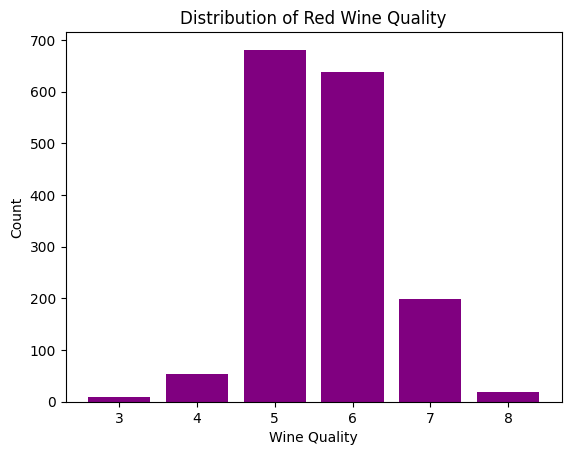

In [24]:
quality_counts = red_wine['quality'].value_counts().sort_index()

xpoints=quality_counts.index
ypoints=quality_counts.values

plt.bar(xpoints, ypoints, color='purple')
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.title("Distribution of Red Wine Quality")

We can see from the graph below that the distribution of data is centered in two values: 5 and 6. We have more than 600 observetions while in the other categories we have at most 200 observation.
I can conclude that the dataset is imbalanced.

In [25]:
x = red_wine.drop('quality', axis=1)
y= red_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

I'll scale the set, necessary for some models.

In [26]:
# Initialize scaler
scaler = StandardScaler()

# Calculate mean and standard deviation on the training set
scaler.fit(X_train)

# Apply transformation to both set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[ 0.43474052,  0.61702595, -0.20929876, ..., -0.18897979,
        -0.39889407, -0.66822296],
       [ 0.43474052, -1.72863768, -0.15740013, ...,  0.65979573,
         1.2383775 , -0.09505496],
       [-0.7657011 ,  0.67287508, -1.29916988, ...,  1.05153828,
         0.06889781, -0.85927895],
       ...,
       [-0.30839001,  0.39362941, -0.67638638, ...,  0.72508615,
        -0.34042009,  0.38258503],
       [-0.36555389,  2.40419824, -0.36499463, ...,  0.33334361,
        -1.27600384,  0.47811303],
       [ 0.14892109,  0.86834705, -0.88398088, ...,  0.00689148,
        -0.04805016, -0.81151495]], shape=(1279, 11))

In [27]:
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'MLP': MLPClassifier(max_iter=2000),
    'Decision Tree': DecisionTreeClassifier()
}

In [28]:
best_models = {}
for name, model in models.items():
    if name == 'Decision Tree':
        x = X_train
        test = X_test
    else:
        x = X_train_scaled
        test = X_test_scaled

    model.fit(x, y_train)
    y_pred = model.predict(test)

    acc = accuracy_score (y_test, y_pred)
    print(f"{name} Accuracy: {acc}")

    if acc >= 0.67:
        best_models[name] = model

SVM Accuracy: 0.653125
Logistic Regression Accuracy: 0.603125
MLP Accuracy: 0.65625
Decision Tree Accuracy: 0.65


These accuracy are a little low, let's try if some oversample can make some higher performance

In [30]:
from sklearn.metrics import classification_report
# lui non la usa uso solo io per controllare prima

print(classification_report(y_test, y_predicted_test))

              precision    recall  f1-score   support

           3       0.50      0.50      0.50         2
           4       0.29      0.29      0.29        14
           5       0.75      0.75      0.75       131
           6       0.68      0.68      0.68       124
           7       0.60      0.66      0.63        44
           8       0.50      0.20      0.29         5

    accuracy                           0.68       320
   macro avg       0.55      0.51      0.52       320
weighted avg       0.68      0.68      0.68       320



We can notice that the precision is high only for 5 and 6 values of quality.
We have to do some oversampling for the categories with lowest precision.

### SMOTE



In [31]:
from imblearn.over_sampling import SMOTE  #library taken from slide 17

X_resampled, y_resampled = SMOTE().fit_resample(x, y)
tree_model = DecisionTreeClassifier(criterion = 'entropy')
tree_model.fit(X_resampled, y_resampled)

y_predicted_train = tree_model.predict(X_resampled)
y_predicted_test = tree_model.predict(X_resampled)
training_acc = accuracy_score(y_resampled, y_predicted_train)
testing_acc = accuracy_score(y_resampled, y_predicted_test)

print(f'training accuracy {training_acc}\n testing accuracy {testing_acc}')


ValueError: Found input variables with inconsistent numbers of samples: [1279, 1599]

In [259]:
print(classification_report(y_resampled, y_predicted_test_2))

#Nel complesso ok accuracy ma valori delle classi piu basse un pò troppo alti ora

              precision    recall  f1-score   support

           3       0.91      0.24      0.38       681
           4       0.74      0.42      0.54       681
           5       0.51      0.94      0.66       681
           6       0.51      0.91      0.65       681
           7       0.61      0.68      0.64       681
           8       0.89      0.38      0.53       681

    accuracy                           0.60      4086
   macro avg       0.69      0.60      0.57      4086
weighted avg       0.69      0.60      0.57      4086



### Random OverSampler

In [260]:
from imblearn.over_sampling import RandomOverSampler

X_resampled, y_resampled = RandomOverSampler(random_state=0).fit_resample(x, y)

tree_model = DecisionTreeClassifier(criterion = 'entropy')
tree_model.fit(X_resampled, y_resampled)

y_predicted_train = tree_model.predict(X_resampled)
y_predicted_test = tree_model.predict(X_resampled)
training_acc = accuracy_score(y_resampled, y_predicted_train)
testing_acc = accuracy_score(y_resampled, y_predicted_test)

print(f'training accuracy {training_acc}\n testing accuracy {testing_acc}')


training accuracy 1.0
 testing accuracy 1.0


In [261]:
print(classification_report(y_resampled, y_predicted_test))

### mmmmh overfitting? ù.ù

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       681
           4       1.00      1.00      1.00       681
           5       1.00      1.00      1.00       681
           6       1.00      1.00      1.00       681
           7       1.00      1.00      1.00       681
           8       1.00      1.00      1.00       681

    accuracy                           1.00      4086
   macro avg       1.00      1.00      1.00      4086
weighted avg       1.00      1.00      1.00      4086



### Manually Undersampling


In [262]:
df_quality_5 = red_wine[red_wine['quality'] == 5]

df_quality_sampled= df_quality_5.sample(n=200, random_state=42)
#print(df_quality_sampled.shape)

df_other_qualities = red_wine[red_wine['quality'] != 5]
#print(df_other_qualities.shape)

df_undersampled = pd.concat([df_other_qualities, df_quality_sampled])
#print(df_undersampled.shape)

df_undersampled = df_undersampled.reset_index(drop=True)
#print(df_undersampled)

df_quality_5 = red_wine[red_wine['quality'] == 5]




(200, 12)
(918, 12)
(1118, 12)
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              11.2             0.280         0.56             1.9      0.075   
1               7.3             0.650         0.00             1.2      0.065   
2               7.8             0.580         0.02             2.0      0.073   
3               8.5             0.280         0.56             1.8      0.092   
4               7.4             0.590         0.08             4.4      0.086   
...             ...               ...          ...             ...        ...   
1113            8.9             0.620         0.18             3.8      0.176   
1114            8.7             0.820         0.02             1.2      0.070   
1115            9.7             0.660         0.34             2.6      0.094   
1116            8.5             0.210         0.52             1.9      0.090   
1117           15.6             0.645         0.49             4.2      0.095 

In [263]:
# isolate data with value 5
df_quality_5 = red_wine[red_wine['quality'] == 5]

# take random sample of 200 rows
df_quality_sampled= df_quality_5.sample(n=200, random_state=42)

df_other_qualities = red_wine[red_wine['quality'] != 5]
df_undersampled = pd.concat([df_other_qualities, df_quality_sampled])

#reset index
df_undersampled = df_undersampled.reset_index(drop=True)

# same for the value 6
df_quality_6 = red_wine[red_wine['quality'] == 6]
df_quality_sampled= df_quality_6.sample(n=200, random_state=42)
df_other_qualities = df_undersampled[df_undersampled['quality'] != 6]
df_undersampled = pd.concat([df_other_qualities, df_quality_sampled])
df_undersampled = df_undersampled.reset_index(drop=True)

# and value 7
df_quality_7 = red_wine[red_wine['quality'] == 7]
df_quality_sampled= df_quality_7.sample(n=200, random_state=42)
df_other_qualities = df_undersampled[df_undersampled['quality'] != 7]
df_undersampled = pd.concat([df_other_qualities, df_quality_sampled])
df_undersampled = df_undersampled.reset_index(drop=True)



print(df_undersampled.shape)
print(df_undersampled.head())


ValueError: Cannot take a larger sample than population when 'replace=False'